# Importing Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Importing Data Set

In [2]:
transaction = []
with open("C:\\Users\DELL\Association\\groceries.csv") as f:
    transaction = f.read()

# splitting the data into separate transactions using separator as "\n"

In [3]:
transaction = transaction.split("\n")

In [4]:
transaction_list = []
for i in transaction:
    transaction_list.append(i.split(","))

In [5]:
all_transaction_list = [i for item in transaction_list for i in item]

In [6]:
from collections import Counter

In [7]:
item_frequencies = Counter(all_transaction_list)

# after sorting

In [8]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

# Storing frequencies and items in separate variables

In [9]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

# barplot of top 10 

In [10]:
import matplotlib.pyplot as plt

<ipython-input-11-8f013887356d>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')


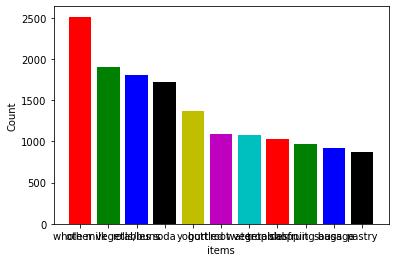

In [11]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

# Creating Data Frame for the transactions data

In [12]:
transaction_series = pd.DataFrame(pd.Series(transaction_list))
transaction_series = transaction_series.iloc[:9835, :]

In [13]:
transaction_series.columns = ["transactions"]

# creating a dummy columns for the each item in each transactions ... Using column names as item name

In [14]:
X = transaction_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

In [15]:
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)

# Most Frequent item sets based on support 

In [16]:
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

<ipython-input-17-3f6c91c30844>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')


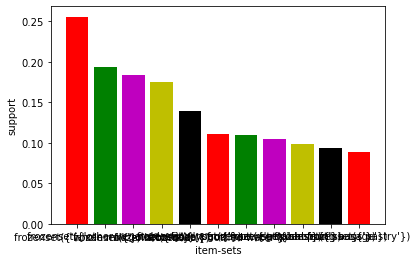

In [17]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [18]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693


In [19]:
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1172,"(other vegetables, yogurt)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1173,"(whole milk, tropical fruit)","(other vegetables, yogurt)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1093,"(yogurt, root vegetables)","(other vegetables, whole milk)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
1088,"(other vegetables, whole milk)","(yogurt, root vegetables)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
793,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1174,"(whole milk, yogurt)","(other vegetables, tropical fruit)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1171,"(other vegetables, tropical fruit)","(whole milk, yogurt)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1053,(root vegetables),"(other vegetables, beef)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1048,"(other vegetables, beef)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123


# To eliminate retundancy

In [20]:
def to_list(i):
    return (sorted(list(i)))

In [21]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [22]:
ma_X = ma_X.apply(sorted)

In [23]:
rules_sets = list(ma_X)

In [24]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [25]:
index_rules = []

In [26]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 

In [27]:
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 

In [28]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1048,"(other vegetables, beef)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1004,"(whole milk, beef)",(root vegetables),0.021251,0.108998,0.008033,0.377990,3.467851,0.005716,1.432456
678,"(pip fruit, other vegetables)",(tropical fruit),0.026131,0.104931,0.009456,0.361868,3.448613,0.006714,1.402638
534,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
1084,"(other vegetables, whole milk, yogurt)",(root vegetables),0.022267,0.108998,0.007829,0.351598,3.225716,0.005402,1.374150
1166,"(other vegetables, whole milk, tropical fruit)",(yogurt),0.017082,0.139502,0.007626,0.446429,3.200164,0.005243,1.554448
360,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
172,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
776,"(other vegetables, citrus fruit)",(tropical fruit),0.028876,0.104931,0.009049,0.313380,2.986526,0.006019,1.303587


# Perform algorithm for different support, connfidence value and max length

In [29]:
frequent_itemsets1 = apriori(X, min_support = 0.007, max_len = 4, use_colnames = True)

# Most Frequent item sets based on support 

<ipython-input-30-53e7063e2dae>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets1.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

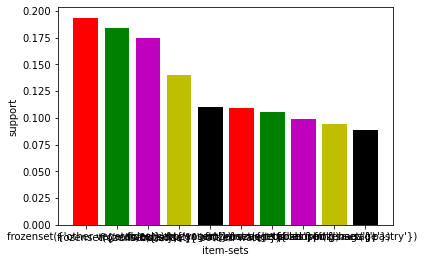

In [30]:
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets1.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets1.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')

In [31]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False,inplace=True)

In [32]:
frequent_itemsets2 = apriori(X, min_support=0.009, max_len=5,use_colnames = True)

# Most Frequent item sets based on support 

In [33]:
frequent_itemsets2.sort_values('support',ascending = False,inplace=True)

<ipython-input-34-8b16ecdf46e9>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets2.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

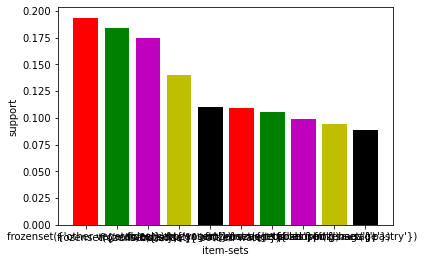

In [34]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets2.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')

In [35]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False,inplace=True)

# As min lenth value is changing the rules is changing.
#rules =1198
#rules1=1390
#rules2=796